 hackrf_sweep. This new feature allows us to scan across the spectrum at up to 8 GHz per second, which means that a full 0 – 6 GHz scan can complete in under a second.
 https://hackrf.readthedocs.io/en/latest/hackrf_sweep.html

In [7]:
!hackrf_sweep --help


hackrf_sweep: invalid option -- -
Usage:
	[-h] # this help
	[-d serial_number] # Serial number of desired HackRF
	[-a amp_enable] # RX RF amplifier 1=Enable, 0=Disable
	[-f freq_min:freq_max] # minimum and maximum frequencies in MHz
	[-p antenna_enable] # Antenna port power, 1=Enable, 0=Disable
	[-l gain_db] # RX LNA (IF) gain, 0-40dB, 8dB steps
	[-g gain_db] # RX VGA (baseband) gain, 0-62dB, 2dB steps
	[-n num_samples] # Number of samples per frequency, 8192-4294967296
	[-w bin_width] # FFT bin width (frequency resolution) in Hz
	[-1] # one shot mode
	[-N num_sweeps] # Number of sweeps to perform
	[-B] # binary output
	[-I] # binary inverse FFT output
	-r filename # output file

Output fields:
	date, time, hz_low, hz_high, hz_bin_width, num_samples, dB, dB, . . .


run HackRF sweep and save csv file


**1mhz to 1000mhz (1Ghz)** Sweep

In [2]:
!hackrf_sweep -f 1:1000 -l 32 -g 32 -w 100000 -N 50 > sweep5.csv

call hackrf_sample_rate_set(20.000 MHz)
call hackrf_baseband_filter_bandwidth_set(15.000 MHz)
Sweeping from 1 MHz to 1001 MHz
Stop with Ctrl-C
0 total sweeps completed, 0.00 sweeps/second
0 total sweeps completed, 0.00 sweeps/second
1 total sweeps completed, 5.74 sweeps/second
1 total sweeps completed, 4.24 sweeps/second
2 total sweeps completed, 6.73 sweeps/second
2 total sweeps completed, 5.58 sweeps/second
3 total sweeps completed, 7.16 sweeps/second
3 total sweeps completed, 6.23 sweeps/second
4 total sweeps completed, 7.37 sweeps/second
4 total sweeps completed, 6.62 sweeps/second
5 total sweeps completed, 7.50 sweeps/second
5 total sweeps completed, 6.86 sweeps/second
6 total sweeps completed, 7.59 sweeps/second
6 total sweeps completed, 7.05 sweeps/second
7 total sweeps completed, 7.66 sweeps/second
7 total sweeps completed, 7.17 sweeps/second
8 total sweeps completed, 7.71 sweeps/second
8 total sweeps completed, 7.28 sweeps/second
9 total sweeps completed, 7.76 sweeps/second
9 

remmber to press (ctrl + c ) to end hackRF_sweep 

view CSV data captured

In [3]:
import pandas as pd
data = pd.read_csv("sweep5.csv")
print("Row    Date,        Time,             hz_low,      hz_high,     hz_bin_width,\ num_samples, dB, dB, ...")
print (data)

Row    Date,        Time,             hz_low,      hz_high,     hz_bin_width,\ num_samples, dB, dB, ...
      2022-01-23   01:29:26.650914    1000000     6000000   98039.22   204  \
0     2022-01-23   01:29:26.650914   11000000    16000000   98039.22   204   
1     2022-01-23   01:29:26.650914    6000000    11000000   98039.22   204   
2     2022-01-23   01:29:26.650914   16000000    21000000   98039.22   204   
3     2022-01-23   01:29:26.650914   21000000    26000000   98039.22   204   
4     2022-01-23   01:29:26.650914   31000000    36000000   98039.22   204   
...          ...               ...        ...         ...        ...   ...   
9994  2022-01-23   01:29:32.671915  976000000   981000000   98039.22   204   
9995  2022-01-23   01:29:32.671915  981000000   986000000   98039.22   204   
9996  2022-01-23   01:29:32.671915  991000000   996000000   98039.22   204   
9997  2022-01-23   01:29:32.671915  986000000   991000000   98039.22   204   
9998  2022-01-23   01:29:32.671915  99

plotsweep is a tool to plot spectrogram images from hackrf_sweep, soapy_power, or rtl_power output.
https://github.com/greatscottgadgets/plotsweep

In [1]:
!plotsweep --help


plotsweep 0.1.0
Plots a spectrogram using hackrf_sweep, soapy_power, or rtl_power output.

USAGE:
    plotsweep [FLAGS] [OPTIONS] <INPUT> <OUTPUT>

FLAGS:
    -h, --help         Prints help information
        --hide-axes    Hide axes
    -V, --version      Prints version information

OPTIONS:
        --colormap <colormap>       [default: viridis]  [possible values: magma, plasma, viridis, inferno]
        --power-max <power-max>     [default: -30]
        --power-min <power-min>     [default: -70]

ARGS:
    <INPUT>     
    <OUTPUT>    


In [4]:
!plotsweep sweep5.csv ex5magma.png --power-min -60 --power-max -15.0 --colormap magma

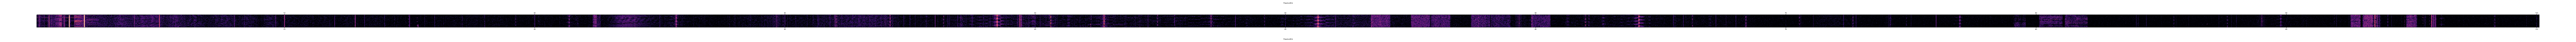

In [5]:
from IPython import display
display.Image("./ex5magma.png")

Heatmap.py IndexError on CSV input 
https://stackoverflow.com/questions/65421912/heatmap-py-indexerror-on-csv-input

You just need to set a lower minimum point using the --db argument, like so:

Since " then it drops to -136 or -145", run:

./heatmap.py --db -150 0 data.csv image.png

that will make sure it renders anything not below -150 too.


In [6]:
!python heatmap.py --db -150 0 sweep5.csv sweep5.png

loading
x: 10200, y: 50, z: (-150.000000, 0.000000)
drawing
labeling
saving


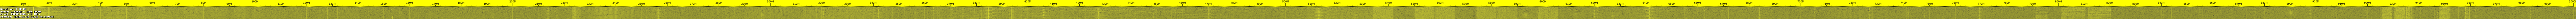

In [7]:
from IPython import display
display.Image("./sweep5.png")